# MSP projekt - část první - Bayesovské odhady
---
Autor: Matěj Konopík, Prosinec 2023
---

Nejdříve načteme knihovny a data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma, truncnorm


In [18]:
data_file_path = '../data/data_1.csv'

data = pd.read_csv(data_file_path)

observations = data['uloha_1 a)']
observations = observations[~np.isnan(observations)].astype(int)

0     2
1     2
2     1
3     3
4     0
     ..
95    3
96    0
97    3
98    1
99    1
Name: uloha_1 a), Length: 100, dtype: int64

## Podčást první 


### Bayesovská analýza parametru lambdaPoissonova rozdělení


> Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotou parametru Poissonova
rozdělení lambda.



Apriorní a aposteriorní hustoty lamba jsou vykresleny pro srovnání dopadu pozorovaných dat na odhad parametru.


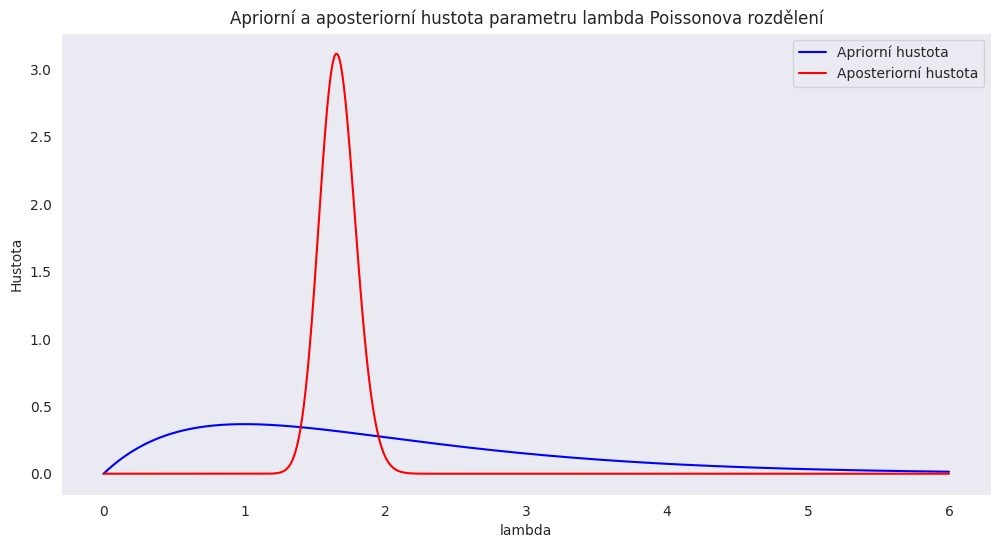

In [19]:
alpha_prior = 2
beta_prior = 1

alpha_posterior = alpha_prior + observations.sum()
beta_posterior = beta_prior + len(observations)

lambda_values = np.linspace(0, 6, 1000)

apriori_densities = gamma.pdf(lambda_values, a=alpha_prior, scale=1/beta_prior)
aposteriori_densities = gamma.pdf(lambda_values, a=alpha_posterior, scale=1/beta_posterior)

plt.figure(figsize=(12, 6))
plt.plot(lambda_values, apriori_densities, label='Apriorní hustota', color='blue')
plt.plot(lambda_values, aposteriori_densities, label='Aposteriorní hustota', color='red')
plt.title('Apriorní a aposteriorní hustota parametru lambda Poissonova rozdělení')
plt.xlabel('lambda')
plt.ylabel('Hustota')
plt.legend()
plt.grid()
plt.show()

### Prediktivní Hustoty Pozorování Poissonova Rozdělení

> Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní
x za jeden časový interval.

Apriorní prediktivní hustota je založena na průměru apriorního Gamma rozdělení.


Aposteriorní prediktivní hustota využívá průměr aposteriorního Gamma rozdělení.


Obě hustoty jsou vypočítány pomocí Poissonova rozdělení a jsou vykresleny pro srovnání.


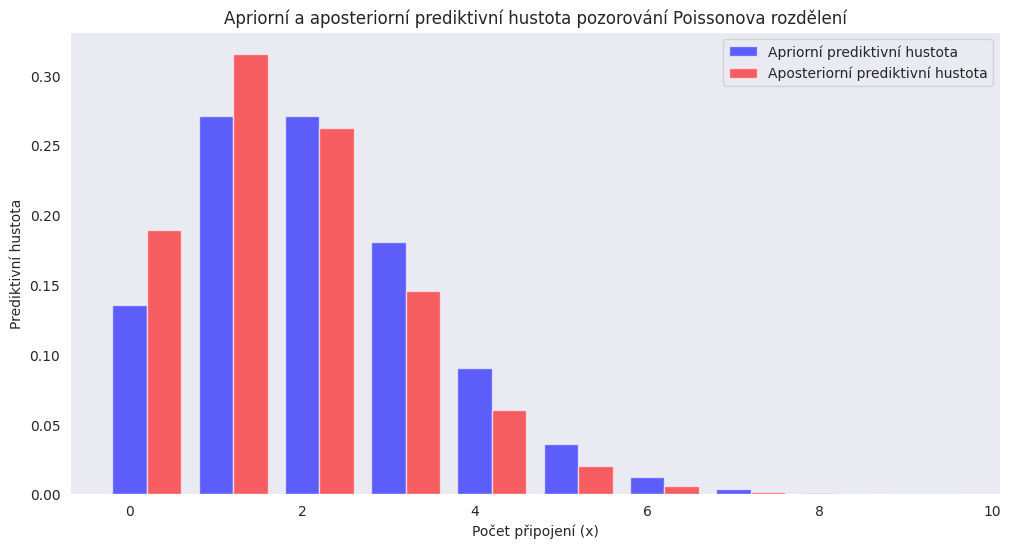

In [20]:
lambda_apriori_mean = alpha_prior / beta_prior
lambda_aposteriori_mean = alpha_posterior / beta_posterior

x_values = np.arange(0, 10)

apriori_predictive_density = poisson.pmf(x_values, lambda_apriori_mean)
aposteriori_predictive_density = poisson.pmf(x_values, lambda_aposteriori_mean)

plt.figure(figsize=(12, 6))
plt.bar(x_values, apriori_predictive_density, width=0.4, label='Apriorní prediktivní hustota', alpha=0.6, align='center', color='blue')
plt.bar(x_values + 0.4, aposteriori_predictive_density, width=0.4, label='Aposteriorní prediktivní hustota', alpha=0.6, align='center', color='red')
plt.title('Apriorní a aposteriorní prediktivní hustota pozorování Poissonova rozdělení')
plt.xlabel('Počet připojení (x)')
plt.ylabel('Prediktivní hustota')
plt.legend()
plt.grid()
plt.show()


### 95% Interval Spolehlivosti pro Parametr lambda

> Sestrojte 95% interval spolehlivosti pro parametr lambda z apriorního a aposteriorního
rozdělení a porovnejte je.

Interval spolehlivosti pro Gamma rozdělení se vypočítá pomocí jeho kumulativní distribuční funkce (CDF).


Pro obě rozdělení nalezneme hodnoty lambda, kde CDF Gamma rozdělení dosahuje hodnot 0.025 a 0.975.


In [21]:
lower_bound_apriori = gamma.ppf(0.025, a=alpha_prior, scale=1/beta_prior)
upper_bound_apriori = gamma.ppf(0.975, a=alpha_prior, scale=1/beta_prior)

lower_bound_aposteriori = gamma.ppf(0.025, a=alpha_posterior, scale=1/beta_posterior)
upper_bound_aposteriori = gamma.ppf(0.975, a=alpha_posterior, scale=1/beta_posterior)

print(f"95% Interval spolehlivosti pro apriorní rozdělení: ({lower_bound_apriori}, {upper_bound_apriori})")
print(f"95% Interval spolehlivosti pro aposteriorní rozdědlení: ({lower_bound_aposteriori}, {upper_bound_aposteriori})")


95% Interval spolehlivosti pro apriorní rozdělení: (0.24220927854396496, 5.571643390938898)
95% Interval spolehlivosti pro aposteriorní rozdědlení: (1.4213461513304455, 1.9241339817546559)


### Bodové Odhady Parametru lambda

> Vyberte si dva aposteriorní bodové odhady parametru lambda, porovnejte je a okomentujte
jejich výběr.
 


Průměr Gamma rozdělení je alfa/beta. Pro aposteriorní rozdělení je to alfa_posterior/beta_posterior.


Medián Gamma rozdělení získáme pomocí kumulativní distribuční funkce (CDF), jako hodnotu lambda, kde CDF dosahuje 0.5.


Průměr odráží střední tendenci, zatímco medián je odolnější vůči extrémním hodnotám.



In [22]:
mean_aposteriori = alpha_posterior / beta_posterior

median_aposteriori = gamma.ppf(0.5, a=alpha_posterior, scale=1/beta_posterior)

print("Aposteriorní střední hodnota: {}".format(mean_aposteriori))
print("Aposteriorní medián: {}".format(median_aposteriori))


Aposteriorní střední hodnota: 1.6633663366336633
Aposteriorní medián: 1.6600671732693628


### Bodové Odhady Počtu Pozorování

> Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a
porovnejte je.

Odhady odrážejí očekávaný počet připojení za 1 ms před (průměr Poissonova rozdělení pro apriorní odhad) a po (průměr Poissonova rozdělení pro aposteriorní odhad) pozorování dat. Rozdíl mezi odhady poskytuje přehled o dopadu pozorovaných dat na naše očekávání.


In [23]:
apriori_point_estimate = alpha_prior / beta_prior

aposteriori_point_estimate = alpha_posterior / beta_posterior

print(f"Apriorní bodový odhad: {apriori_point_estimate}")
print(f"Aposteriorní bodový odhad: {aposteriori_point_estimate}")


Apriorní bodový odhad: 2.0
Aposteriorní bodový odhad: 1.6633663366336633


## Podčást druhá

### Aproximace diskrétním rozdělením


Nejdříve načteme data do dataframe.

In [24]:
file_path = '../data/Projekt-2_Data.xlsx'  # Update this path
data = pd.read_excel(file_path, sheet_name='Úloha 1')

### Vizualizace Apriorní, Aposteriorní Distribuce a Funkce Věrohodnosti

> Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti.
Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti
v obrázku.


Zde použijeme pro diskretizaci 50 binů. Výsledkem je graf, který zobrazuje apriorní a aposteriorní hustotu parametru b a funkci věrohodnosti.


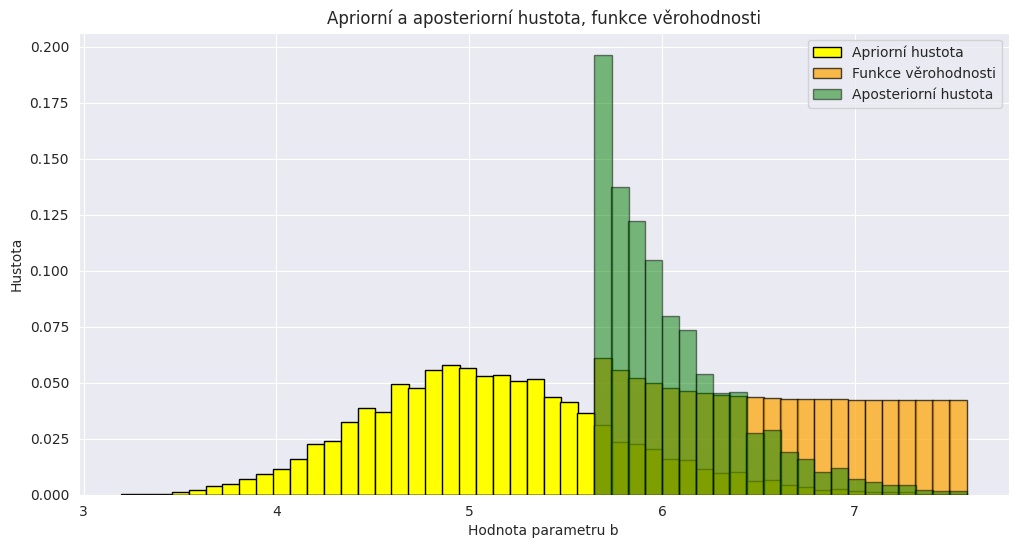

In [39]:
observations = data['uloha_1 b)_pozorování'].dropna()

grouped_max_values = data.groupby('skupina')['uloha_1 b)_prior'].max()

bin_edges = np.linspace(grouped_max_values.min(), grouped_max_values.max(), 50 + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

binned_counts, _ = np.histogram(grouped_max_values, bins=bin_edges)
binned_pmf = binned_counts / binned_counts.sum()


mu = 3
sigma = 1
a = 1
param_index = np.inf
sum = 0
posts = []
likelihoods = []

for param_index, param_probability in zip(bin_centers, binned_pmf):
    norm = truncnorm(a=(a - mu) / sigma, b=(param_index - mu) / sigma, loc=mu, scale=sigma)
    likelihood = np.prod(norm.pdf(observations))
    likelihoods.append(likelihood)
    posts.append(likelihood * param_probability)
    sum += likelihood * param_probability
    
likelihoods = np.array(likelihoods, dtype=np.float64)
posterior = np.array(posts, dtype=np.float64) / sum

normalized_likelihoods = likelihoods / np.sum(likelihoods)
normalized_posterior = posterior / np.sum(posterior)

plt.figure(figsize=(12, 6))
plt.bar(bin_centers, binned_pmf, width=0.09, color='yellow', label='Apriorní hustota', edgecolor='black')
plt.bar(bin_centers, normalized_likelihoods, width=0.09, color='orange', alpha=0.7, label='Funkce věrohodnosti', edgecolor='black')
plt.bar(bin_centers, normalized_posterior, width=0.09, color='green', alpha=0.5, label='Aposteriorní hustota', edgecolor='black')
plt.xlabel('Hodnota parametru b')
plt.ylabel('Hustota')
plt.title('Apriorní a aposteriorní hustota, funkce věrohodnosti')
plt.legend()
plt.show()


### 95% Interval Spolehlivosti pro Parametr b

>Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro
parametr b.


In [27]:
posterior_cdf = np.cumsum(normalized_posterior)

lower_bound_idx = np.where(posterior_cdf >= 0.025)[0][0]
upper_bound_idx = np.where(posterior_cdf >= 0.975)[0][0]

CI_lower = bin_centers[lower_bound_idx]
CI_upper = bin_centers[upper_bound_idx]

print(f"95% interval spolehlivosti pro parametr b: ({CI_lower}; {CI_upper})")


95% interval spolehlivosti pro parametr b: (5.693712028182375; 7.008910628347767)


### Bodové Odhady Parametru b

>Vyberte dva bodové odhady parametru b a spočítejte je.


In [28]:
posterior_mean = np.sum(bin_centers * normalized_posterior)

mode_index = np.argmax(normalized_posterior)
posterior_mode = bin_centers[mode_index]

print(f"Střední hodnota pro b: {posterior_mean}")
print(f"Modus pro b: {posterior_mode}")


Střední hodnota pro b: 6.052771319832352
Modus pro b: 5.693712028182375
